In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import c
from astropy import constants as const
import astropy.units as u

In [35]:
C_IV_K = 1548.187e-8 #cm 
C_IV_H = 1550.772e-8
kk = 2795.528e-8
cc =c.to(u.cm / u.s).value
nu_K = cc / C_IV_K
nu_H  = cc / C_IV_H
v_th = 11.7673179819719e5 #cm/s
K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952
me = const.m_e.value

yy = np.arange(-1e4,1e4,10)


def VH(x,gamma_line,lines):
    del_lam_D = v_th / lines
    a = gamma_line / (4*np.pi*del_lam_D)
    dy = abs(yy[1]- yy[0])
    summ = np.zeros(len(x))
    for aa,bb in enumerate(x):
        for ii,jj in enumerate(yy):
            summ[aa] += np.exp(-jj**2) / ((bb-jj)**2+a**2) *dy
    return summ*a/np.pi

def change_x_to_lam(x,lines):
    del_lam_D = v_th / lines
    lam = np.zeros(len(xx))
    for ii, jj in enumerate(xx):
        lam[ii] = lines / (jj*v_th/cc + 1)
    return lam

NN = int(1e3)
xx = np.linspace(-5,5,NN)
v_k = VH(xx,K_gamma,C_IV_K)
lam_x = change_x_to_lam(xx,C_IV_K)*1e8

Text(0.5, 0, '$\\lambda [\\AA]$')

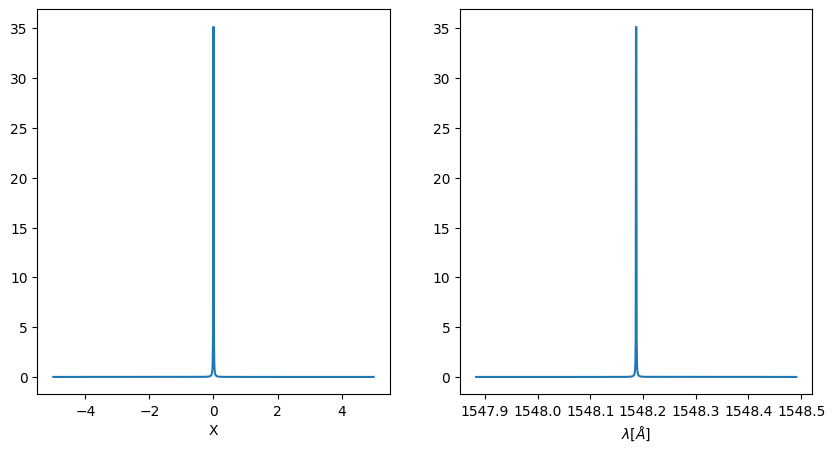

In [36]:
fig = plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.plot(xx,v_k)
plt.xlabel('X')

plt.subplot(122)
plt.plot(lam_x,v_k)
plt.xlabel(r'$\lambda [\AA]$')
# plt.xlim(1548.1,1548.3)
